# Pandas Built-in Data Visualization - 2



In [1]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.read_csv('df31.csv', index_col=0)
df2 = pd.read_csv('df32.csv')

## Line Plots
Line plots are used to compare two or more variables. By default the x-axis values are taken from the index.>

Line plots happen to be the default pandas plot. They are accessible through <tt>df.plot()</tt> as well as <tt>df.plot.line()</tt>

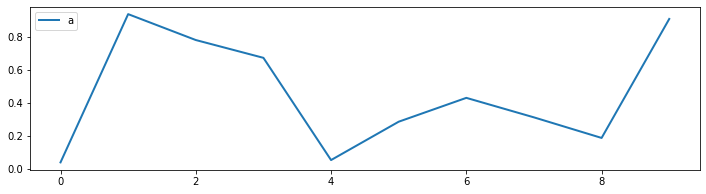

In [15]:
# df2.plot(), will also give the same result. 
df2.plot.line(y='a',figsize=(12,3),lw=2);

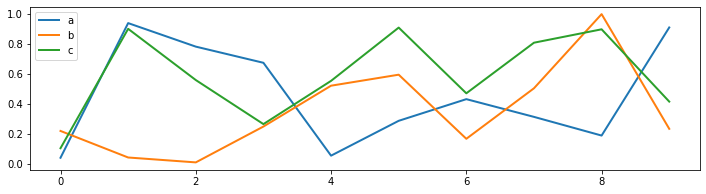

In [16]:
df2.plot.line(y=['a','b','c'],figsize=(12,3),lw=2);

## Area Plots
Area plots represent cumulatively stacked line plots where the space between lines is emphasized with colors. 

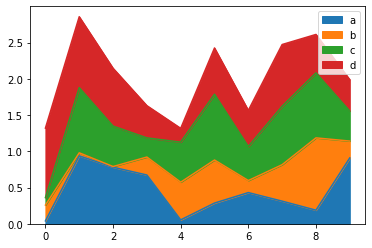

In [56]:
df2.plot.area();

It often helps to mute the colors by passing an <strong>alpha</strong> transparency value between 0 and 1.

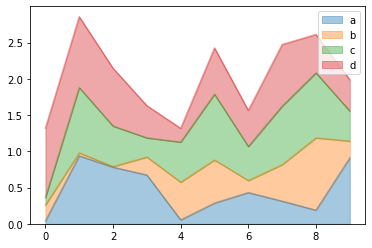

In [17]:
df2.plot.area(alpha=0.4);

To produce a blended area plot, pass a <strong>stacked=False</strong> argument:

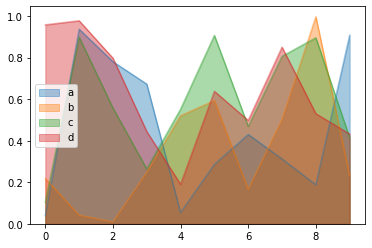

In [18]:
df2.plot.area(stacked=False, alpha=0.4);

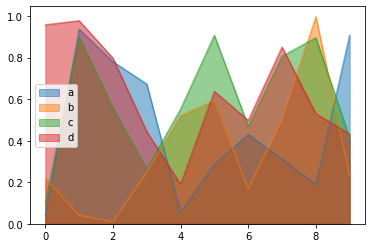

In [57]:
df2.plot.area(stacked=False);

## Scatter Plots
Scatter plots are a useful tool to quickly compare two variables, and to look for possible trends. 

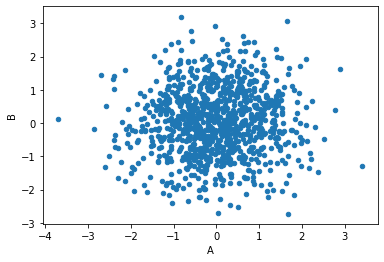

In [19]:
df1.plot.scatter(x='A',y='B');

### Scatter plots with colormaps
You can use <strong>c</strong> to color each marker based off another column value. Use `cmap` to indicate which colormap to use.<br>
For all the available colormaps, check out: http://matplotlib.org/users/colormaps.html

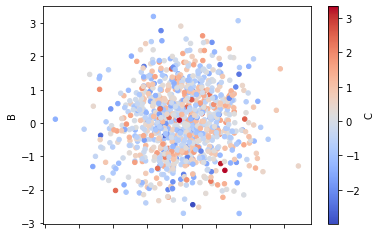

In [20]:
df1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm');

<div class="alert alert-danger"><strong>NOTE:</strong> As of pandas 0.23.4 there is a <a href='https://github.com/pandas-dev/pandas/issues/10611'>known issue</a> where colormaps chop off the x-axis tics.<br>This is due to be fixed in an <a href='https://github.com/pandas-dev/pandas/pull/20446'>upcoming release</a>. For now, the following matplotlib code will work:</div>

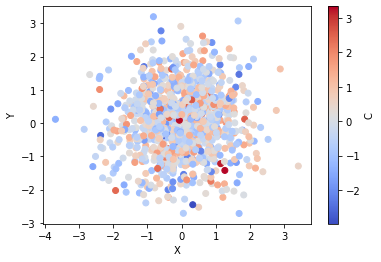

In [21]:
import matplotlib.pyplot as plt
plt.scatter(df1['A'],df1['B'],c=df1['C'],cmap='coolwarm')
plt.colorbar().set_label('C')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Scatter plots with sized markers
Alternatively you can use <strong>s</strong> to indicate marker size based off another column. The <strong>s</strong> parameter needs to be an array, not just the name of a column:

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


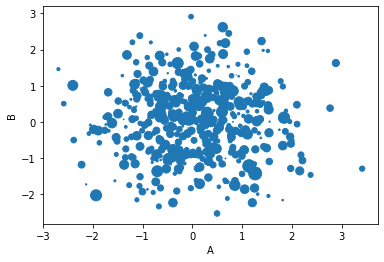

In [22]:
df1.plot.scatter(x='A',y='B',s=df1['C']*50);

The warning above appeared because some `df1['C']` values are negative. We can fix this finding the minimum value, writing a function that adds to each value, and applying our function to the data with <strong>.apply(func)</strong>.

Also, these data points have a lot of overlap. We can address this issue by passing in an <strong>alpha</strong> blending value between 0 and 1 to make markers more transparent.

In [23]:
df1['C'].min()

-2.987971138961773

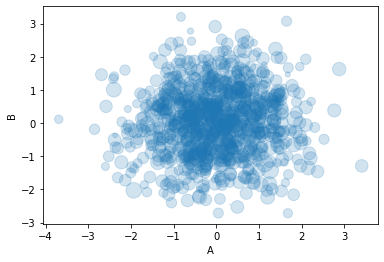

In [3]:
def add_three(val):
    return val+3

df1.plot.scatter(x='A',y='B',s=df1['C'].apply(add_three)*45, alpha=0.2);

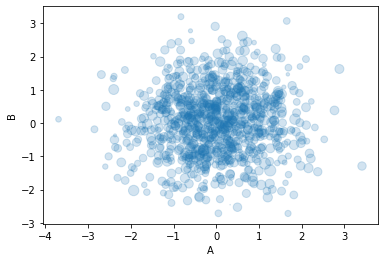

In [8]:
df1.plot.scatter(x='A',y='B',s=df1['C'].apply(add_three)*20,alpha=0.2);

Let's see what this looks like with our smaller dataset. Here we'll also apply .autoscale() to tighten the axes.

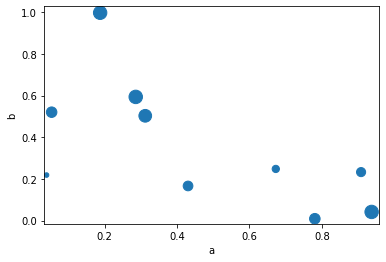

In [9]:
df2.plot.scatter(x='a',y='b',s=df2['c']*200).autoscale(enable=True, axis='both', tight=True);

## BoxPlots
Box plots, aka "box and whisker diagrams", describe the distribution of data by dividing data into <em>quartiles</em> about the mean.<br>
Look <a href='https://en.wikipedia.org/wiki/Box_plot'>here</a> for a description of boxplots. <a href='https://pandas.pydata.org/pandas-docs/stable/visualization.html#box-plots'>[reference]</a>

<div class="alert alert-danger"><strong>NOTE:</strong> At this time we recommend using <tt><font color=black>df.boxplot()</font></tt> instead of <tt><font color=black>df.plot.box()</font></tt> as certain operations such as groupby currently do not work properly in <tt>df.plot.box()</tt>. For more information visit <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html'>https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html</a></div></div>

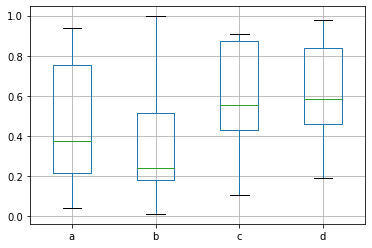

In [26]:
df2.boxplot();

### Boxplots with Groupby
To draw boxplots based on groups, first pass in a list of columns you want plotted (including the groupby column), then pass <strong>by='columname'</strong> into <tt>.boxplot()</tt>. Here we'll group records by the <strong>'e'</strong> column, and draw boxplots for the <strong>'b'</strong> column.

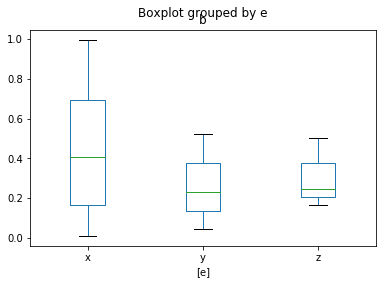

In [27]:
df2[['b','e']].boxplot(by='e', grid=False);

In the next section on Customizing Plots we'll show how to change the title and axis labels.

## Kernel Density Estimation (KDE) Plot
These plots are accessible either through <tt>df.plot.kde()</tt> or <tt>df.plot.density()

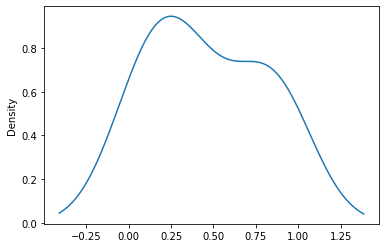

In [28]:
df2['a'].plot.kde();

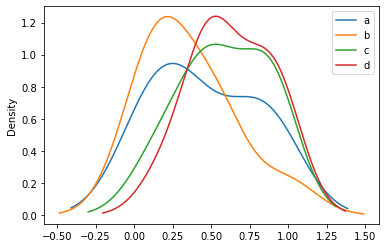

In [29]:
df2.plot.density();

## Colors, Widths and Linestyles
The pandas <tt>.plot()</tt> method takes optional arguments that allow you to control linestyles, colors, widths and more.

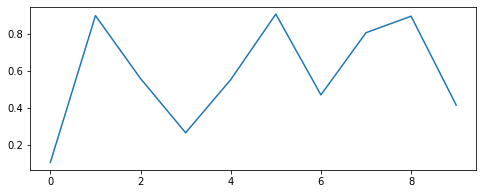

In [34]:
# START WITH A SIMPLE LINE PLOT-Default plot is a line plot
df2['c'].plot(figsize=(8,3));

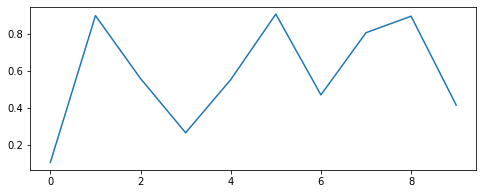

In [35]:
df2['c'].plot.line(figsize=(8,3));

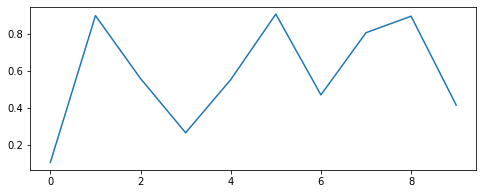

In [36]:
df2['c'].plot.line(figsize=(8,3),ls='-');

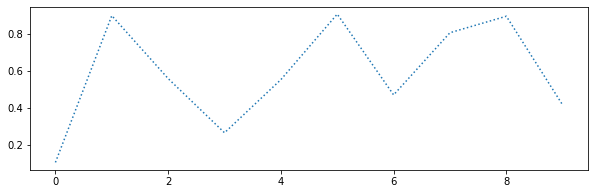

In [37]:
df2['c'].plot.line(figsize=(10,3),ls=':');

<table style="display: inline-block">
    <tr><th>PROPERTY</th><th>CODE</th><th>VALUE</th><th>EFFECT</th></tr>
    <tr><td>linestyle</td><td><tt>ls</tt></td><td><tt>'-'</tt></td><td>solid line (default)</td></tr>
    <tr><td>linestyle</td><td><tt>ls</tt></td><td><tt>'--'</tt></td><td>dashed line</td></tr>
    <tr><td>linestyle</td><td><tt>ls</tt></td><td><tt>'-.'</tt></td><td>dashed/dotted line</td></tr>
    <tr><td>linestyle</td><td><tt>ls</tt></td><td><tt>':'</tt></td><td>dotted line</td></tr>
    <tr><td>color</td><td><tt>c</tt></td><td>string</td><td></td></tr>
    <tr><td>linewidth</td><td><tt>lw</tt></td><td>float</td><td></td></tr>
</table>

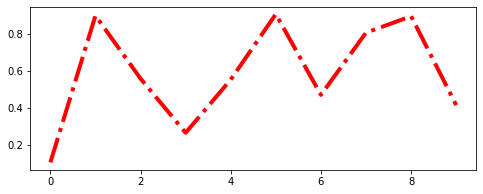

In [38]:
df2['c'].plot.line(ls='-.', c='r', lw='4', figsize=(8,3));

## Adding Titles and Axis Labels

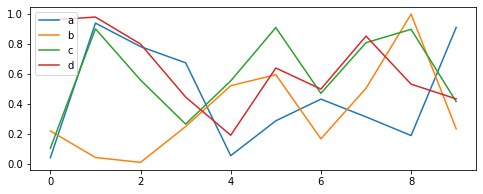

In [39]:
# START WITH A SIMPLE MULTILINE PLOT
df2.plot(figsize=(8,3));

Before we tackle the issue of legend placement, let's add a title and axis labels.

### Object-oriented plotting

When we call <tt>df.plot()</tt>, pandas returns a <tt>matplotlib.axes.AxesSubplot</tt> object. We can set labels
on that object so long as we do it in the same jupyter cell. Setting an autoscale is done the same way.

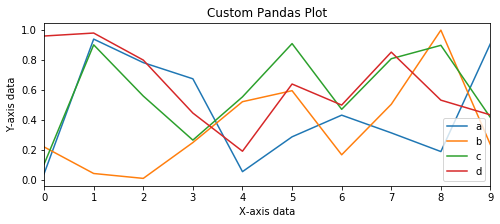

In [40]:
title='Custom Pandas Plot'
ylabel='Y-axis data'
xlabel='X-axis data'

ax = df2.plot(figsize=(8,3),title=title)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.autoscale(axis='x',tight=True);

<font color=green>NOTE: The plot shrinks a bit so that the figure size can accommodate the new axis labels.</font>

## Plot Legend Placement
Pandas tries to optimize placement of the legend to reduce overlap on the plot itself. However, we can control the placement ourselves, and even place the legend outside of the plot. We do this through the <tt>.legend()</tt> method.


For starters we can pass a location code. <tt>.legend(loc=1)</tt> places the legend in the upper-right corner of the plot.<br>Alternatively we can pass a location string: <tt>.legend(loc='upper right')</tt> does the same thing.

<table style="display: inline-block">
<tr><th>LOCATION CODE</th><th>LOCATION STRING</th></tr>
<tr><td>0</td><td>'best'</td></tr>
<tr><td>1</td><td>'upper right'</td></tr>
<tr><td>2</td><td>'upper left'</td></tr>
<tr><td>3</td><td>'lower left'</td></tr>
<tr><td>4</td><td>'lower right'</td></tr>
<tr><td>5</td><td>'right'</td></tr>
<tr><td>6</td><td>'center left'</td></tr>
<tr><td>7</td><td>'center right'</td></tr>
<tr><td>8</td><td>'lower center'</td></tr>
<tr><td>9</td><td>'upper center'</td></tr>
<tr><td>10</td><td>'center'</td></tr>
</table>

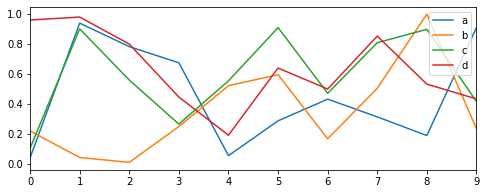

In [41]:
ax = df2.plot(figsize=(8,3))
ax.autoscale(axis='x',tight=True)
ax.legend(loc=1);

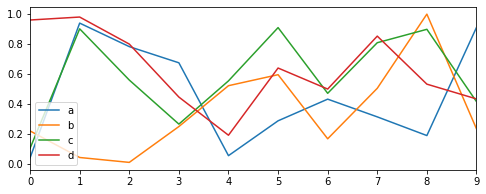

In [42]:
# FIRST, PLACE THE LEGEND IN THE LOWER-LEFT
ax = df2.plot(figsize=(8,3))
ax.autoscale(axis='x',tight=True)
ax.legend(loc=3);

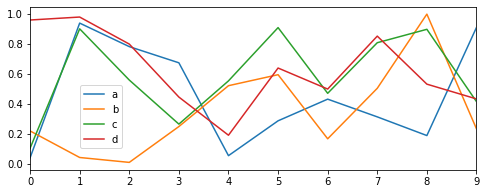

In [43]:
# NEXT, MOVE THE LEGEND A LITTLE TO THE RIGHT AND UP
ax = df2.plot(figsize=(8,3))
ax.autoscale(axis='x',tight=True)
ax.legend(loc=3, bbox_to_anchor=(0.1,0.1));

### Placing the Legend Outside the Plot
In the above plot we passed <tt>(0.1,0.1)</tt> as our two-item tuple. This places the legend slightly to the right and slightly upward.<br>To place the legend outside the plot on the right-hand side, pass a value greater than or equal to 1 as the first item in the tuple.

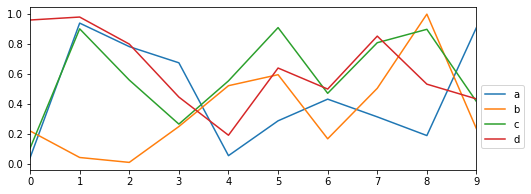

In [44]:
ax = df2.plot(figsize=(8,3))
ax.autoscale(axis='x',tight=True)
ax.legend(loc=3, bbox_to_anchor=(1.0,0.1));